In [41]:
%matplotlib notebook

In [42]:
import pandas as pd
import sklearn as sk
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [43]:
headers = ['season', 'age', 'child_diseases','accident', 'surgical_int', 'high_fevers', 'alcohol', 'smoking', 'hours_sitting', 'diagnosis']

In [44]:
data = pd.read_csv('../data/IVF/fertility_Diagnosis.txt', names = headers)

In [45]:
data

season   age  child_diseases  accident  surgical_int  high_fevers  \
0    -0.33  0.69               0         1             1            0   
1    -0.33  0.94               1         0             1            0   
2    -0.33  0.50               1         0             0            0   
3    -0.33  0.75               0         1             1            0   
4    -0.33  0.67               1         1             0            0   
5    -0.33  0.67               1         0             1            0   
6    -0.33  0.67               0         0             0           -1   
7    -0.33  1.00               1         1             1            0   
8     1.00  0.64               0         0             1            0   
9     1.00  0.61               1         0             0            0   
10    1.00  0.67               1         1             0           -1   
11    1.00  0.78               1         1             1            0   
12    1.00  0.75               1         1             1            0   
13    1.00  0.81               1         0             0            0   
14    1.00  0.94               1         1             1            0   
15    1.00  0.81               1         1             0            0   
16    1.00  0.64               1         0             1            0   
17    1.00  0.69               1         0             1            0   
18    1.00  0.75               1         1             1            0   
19    1.00  0.67               1         0             0            0   
20    1.00  0.67               0         0             1            0   
21    1.00  0.75               1         0             0            0   
22    1.00  0.67               1         1             0            0   
23    1.00  0.69               1         0             1           -1   
24    1.00  0.56               1         0             1            0   
25    1.00  0.67               1         0             0            0   
26    1.00  0.67               1         0             1            0   
27    1.00  0.78               1         1             0            1   
28    1.00  0.58               0         0             1            0   
29    1.00  0.67               0         0             1            0   
..     ...   ...             ...       ...           ...          ...   
70   -0.33  0.50               1         1             0           -1   
71    0.33  0.69               1         0             0            1   
72    1.00  0.56               1         0             0            1   
73   -1.00  0.50               1         0             0            1   
74   -1.00  0.53               1         0             0            1   
75   -1.00  0.78               1         0             1            1   
76   -1.00  0.75               1         0             1            1   
77   -1.00  0.72               1         1             1            1   
78   -1.00  0.53               1         1             0            1   
79   -1.00  1.00               1         0             1            1   
80   -0.33  0.92               1         1             0            1   
81   -1.00  0.81               1         1             1            1   
82   -0.33  0.92               1         0             0            1   
83   -0.33  0.86               1         1             1            1   
84   -0.33  0.78               1         0             0            1   
85   -0.33  0.89               1         1             0            0   
86   -0.33  0.75               1         1             1            0   
87   -0.33  0.75               1         1             1            1   
88   -0.33  0.83               1         1             1            0   
89   -0.33  0.81               1         1             1            0   
90   -0.33  0.81               1         1             1            1   
91    0.33  0.78               1         0             0            0   
92    0.33  0.75               1         1             0      

In [46]:
data['diagnosis'] = data['diagnosis'].map({'N': 0, 'O': 1})


In [47]:
features = data.drop(['diagnosis'], axis=1, inplace=False)

In [48]:
target = data[['diagnosis']]

In [49]:
from sklearn.model_selection import train_test_split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [50]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [51]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier, XGBRegressor

In [52]:
xgbc = XGBClassifier()

In [53]:
xgbc

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [54]:
xgbc.fit(x_train, y_train.values.ravel())
print(xgbc.predict(x_test))
print(y_test.values.ravel())

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]


/home/ivan/coding_projects/testing3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Random Search

https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

In [55]:
params = {
        'min_child_weight': [1, 5, 10,20],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,8,10,20],
        'n_estimators': [5,10,20,50,200,500]
        }

In [56]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import itertools

In [57]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [58]:
X = x_train
Y = y_train.values.ravel()

folds = 3
param_comb = 600

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

random_search = RandomizedSearchCV(xgb, 
                                   param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='roc_auc', 
                                   n_jobs=4, 
                                   cv=skf.split(X,Y), 
                                   verbose=3, 
                                   random_state=1001 )

# Here we go
random_search.fit(X, Y)


Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV] subsample=1.0, n_estimators=200, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.8 
[CV] subsample=1.0, n_estimators=200, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.8 
[CV] subsample=1.0, n_estimators=200, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.8 
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=20, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=200, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=20, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=20, gamma=0.5, colsample_bytree=1.0, score=0.6875, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=20, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=200, min_child_weig

[CV]  subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=20, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=20, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=3, gamma=1, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=3, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=20, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=0.6, score=0.8177083333333334, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=10, gamma=0.5, colsample_bytree=0.6 
[CV] subsample=0.8, n_estimators=5, min_child_weight=20, max_depth=4, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=8, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=5, min_child_weight

[CV] subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=3, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=8, gamma=1, colsample_bytree=0.6, score=0.6875, total=   0.0s
[CV]  subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=3, gamma=2, colsample_bytree=0.6, score=0.7291666666666666, total=   0.0s
[CV]  subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=8, gamma=0.5, colsample_bytree=0.8, score=0.6875, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=1, max_depth=3, gamma=2, colsample_bytree=0.6 
[CV] subsample=0.8, n_estimators=500,

[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=1.0, score=0.6979166666666666, total=   0.0s
[CV]  subsample=1.0, n_estimators=20, min_child_weight=1, max_depth=20, gamma=0.5, colsample_bytree=1.0, score=0.391304347826087, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=20, min_child_weight=10, max_depth=20, gamma=1.5, colsample_bytree=0.8 
[CV] subsample=1.0, n_estimators=20, min_child_weight=1, max_depth=20, gamma=0.5, colsample_bytree=1.0 
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=10, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=20, min_child_weight=10, max_depth=20, gamma=1.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=20, 

[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=5, gamma=1, colsample_bytree=0.8 
[CV] subsample=0.6, n_estimators=200, min_child_weight=10, max_depth=4, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=5, max_depth=10, gamma=0.5, colsample_bytree=0.8, score=0.6875, total=   0.0s
[CV] subsample=0.8, n_estimators=20, min_child_weight=5, max_depth=10, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=5, max_depth=10, gamma=0.5, colsample_bytree=0.8, score=0.5289855072463767, total=   0.0s
[CV] subsample=0.8, n_estimators=20, min_child_weight=5, max_depth=10, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=5, gamma=1, colsample_bytree=0.8, score=0.855072463768116, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=5, max_dep

[CV] subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=10, gamma=0.5, colsample_bytree=1.0, score=0.6458333333333334, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=10, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=200, min_child_weight=20, max_depth=3, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=200, min_child_weight=20, max_depth=3, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=10

[CV]  subsample=0.8, n_estimators=5, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=0.5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.6 
[CV] subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=0.5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=10, max_depth=4, gamma

[CV] subsample=0.8, n_estimators=20, min_child_weight=20, max_depth=20, gamma=2, colsample_bytree=0.6 
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=20, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, gamma=1, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, gamma=1, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=10, max_depth=3, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=0.8, n_estimators=20, min_child_weight=20, max_depth=20, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=10, max_depth=3, gamma=5, colsample_bytree=1.0 
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=5, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=10, max_depth=3, gamma=5, colsample_bytree

[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.1s
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=5, min_child_weight=1, max_depth=3, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=5, max_depth=5, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=5, max_depth=5, gamma=0.5, colsample_bytree=0.6, score=0.6875, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=5, max_depth=5, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=5, max_depth=5, gamma=0.5, colsample_bytree=0.6, score=0.5289855072463767, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=5, max_depth=5, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, 

[CV]  subsample=1.0, n_estimators=20, min_child_weight=5, max_depth=5, gamma=1.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=10, min_child_weight=5, max_depth=4, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=20, min_child_weight=5, max_depth=5, gamma=1.5, colsample_bytree=0.8 
[CV] subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=1.0 
[CV] subsample=1.0, n_estimators=10, min_child_weight=5, max_depth=4, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=20, min_child_weight=5, max_depth=5, gamma=1.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=0.8, n_estimators=500, min_child_weight=

[CV] subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=20, gamma=0.5, colsample_bytree=1.0 
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=10, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=20, gamma=0.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=20, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=10, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=10, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=4, gamma=1.5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV]  subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=20, gamma=0.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, ma

[CV] subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=10, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=8, gamma=1, colsample_bytree=1.0, score=0.6875, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=8, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=5, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=10, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=5, gamma=2, colsample_bytree=0.8 
[CV] subsample=1.0, n_estimators=10, min_child_weight=1, max_depth=10, gamma=1, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=10, gamma=2, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=

[CV] subsample=1.0, n_estimators=50, min_child_weight=20, max_depth=8, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=20, max_depth=3, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=10, max_depth=5, gamma=2, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=200, min_child_weight=20, max_depth=8, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=20, min_child_weight=20, max_depth=20, gamma=0.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=20, min_child_weight=20, max_depth=20, gamma=0.5, colsample_bytree=1.0 
[CV] subsample=0.8, n_estimators=10, min_child_weight=10, max_depth=3, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=20, max_depth=8, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=20, max_depth

[CV]  subsample=1.0, n_estimators=10, min_child_weight=20, max_depth=3, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=10, min_child_weight=5, max_depth=10, gamma=1, colsample_bytree=1.0, score=0.6875, total=   0.0s
[CV]  subsample=1.0, n_estimators=200, min_child_weight=1, max_depth=3, gamma=1.5, colsample_bytree=0.6, score=0.7753623188405797, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=5, max_depth=10, gamma=1, colsample_bytree=1.0 
[CV] subsample=1.0, n_estimators=10, min_child_weight=20, max_depth=3, gamma=2, colsample_bytree=0.6 
[CV] subsample=1.0, n_estimators=200, min_child_weight=1, max_depth=3, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=10, max_depth=10, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=200, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=10, min_child_weight

[Parallel(n_jobs=4)]: Done 392 tasks      | elapsed:    2.0s


[CV]  subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=5, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=10, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=8, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=10, gamma=5, colsample_bytree=0.8 
[CV] subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=8, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=10, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=200, min_child_weight=1, max_depth=10, gamma=1, colsample_bytree=0.8, score=0.8695652173913043, total=   0.0s
[CV] subsample=0.6, n_estimators=10, mi

[CV]  subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=4, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=4, gamma=1.5, colsample_bytree=1.0 
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=20, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=1.0, score=0.7391304347826088, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=4, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=4, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=3, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=10

[CV] subsample=0.6, n_estimators=5, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=5, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=4, gamma=1, colsample_bytree=1.0, score=0.6770833333333334, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=20, max_depth=4, gamma=2, colsample_bytree=0.6 
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=4, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=20, max_depth=8, gamma=1, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=200, min_child_weight=1, max_depth=5, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=10, gamma=1.5, colsample_bytree=1.0, score=0.7826086956521738, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_we

[CV] subsample=1.0, n_estimators=20, min_child_weight=10, max_depth=10, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=10, min_child_weight=1, max_depth=3, gamma=1.5, colsample_bytree=1.0, score=0.855072463768116, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=20, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=3, gamma=1, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=5, min_child_weight=10, max_depth=4, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=20, min_child_weight=10, max_depth=10, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=50, min_child_weight=10, max_depth=20, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=5, min_child_weight=10, max_depth=3, gamma=0.5, colsample_bytree=0.8 
[CV] subsample=0.8, n_estimators=50, min_child_weight

[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=10, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=5, max_depth=20, gamma=1, colsample_bytree=1.0, score=0.5289855072463767, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=5, max_depth=20, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=8, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=20, min_child_weight=1, max_depth=8, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=20, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=20, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=20, min_child_weight=1, max_depth=8, gamma=1, colsample_bytree=0.8, score=0.71875, total=   0.0s
[CV] subsample=0.6, n_estimators=20, min_child_

[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=3, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=8, gamma=0.5, colsample_bytree=1.0, score=0.8985507246376812, total=   0.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=10, max_depth=5, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, gamma=0.5, colsample_bytree=0.6, score=0.7246376811594203, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=8, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=10, max_depth=3, gamma=0.5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=500, 

[CV] subsample=0.8, n_estimators=500, min_child_weight=5, max_depth=4, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=20, gamma=5, colsample_bytree=0.8, score=0.8913043478260869, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=4, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=3, gamma=2, colsample_bytree=0.6, score=0.7604166666666666, total=   0.0s
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=3, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=3, gamma=1, colsample_bytree=0.6, score=0.8260869565217391, total=   0.0s
[CV] subsample=0.8, n_estimators=5, min_child_weight=20, max_depth=10, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=5, min_child_weight=20, max_depth=10, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimator

[CV]  subsample=0.6, n_estimators=10, min_child_weight=20, max_depth=5, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=10, min_child_weight=20, max_depth=5, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=10, min_child_weight=20, max_depth=5, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=10, max_depth=20, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=20, max_depth=3, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=20, min_child_weight=20, max_depth=3, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=10, max_depth=20, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=0.8, n_estimators=20, min_child_weight=20, max_depth=3, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=10, min

[CV]  subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=10, gamma=0.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=200, min_child_weight=20, max_depth=3, gamma=1, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=10, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=10, max_depth=20, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=10, max_depth=20, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=10, gamma=0.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=20, min_child_weight=20, max_depth=3, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=20, max_depth=4, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=500, 

[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=8, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=8, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=20, min_child_weight=10, max_depth=20, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=20, max_depth=8, gamma=0.5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=5, max_depth=4, 

[CV] subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=5, max_depth=5, gamma=1, colsample_bytree=1.0, score=0.6875, total=   0.0s
[CV]  subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV] subsample=0.8, n_estimators=20, min_child_weight=5, max_depth=5, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=5, max_depth=5, gamma=1, colsample_bytree=1.0, score=0.5289855072463767, total=   0.0s
[CV] subsample=0.8, n_estimators=20, min_child_weight=5, max_dept

[CV] subsample=0.8, n_estimators=5, min_child_weight=10, max_depth=3, gamma=1, colsample_bytree=0.8 
[CV] subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=10, gamma=0.5, colsample_bytree=1.0 
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, gamma=0.5, colsample_bytree=1.0, score=0.5289855072463767, total=   0.0s
[CV]  subsample=0.8, n_estimators=5, min_child_weight=10, max_depth=3, gamma=1, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, gamma=0.5, colsample_bytree=1.0 
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=5, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=10, gamma=0.5, colsam

[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=10, gamma=1.5, colsample_bytree=0.6 
[CV] subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=8, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=5, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=0.8, score=0.6956521739130435, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=1, max_depth=8, gamma=2, colsample_bytree=1.0 
[CV] subsample=0.8, n_estimators=5, min_child_weight=1, max_depth=10, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=10, gamma=1.5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=10, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=1, max_depth=8, gamma=2, colsample_bytree=1.0, score=0.765625, total=   0.0s
[CV]  subsample=0.8, n_estimators=5, min_child_weight=1, max_depth=10, gamma=0.5, 

[CV] subsample=1.0, n_estimators=20, min_child_weight=1, max_depth=5, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=5, min_child_weight=1, max_depth=4, gamma=2, colsample_bytree=0.6, score=0.7395833333333333, total=   0.0s
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=0.6 
[CV] subsample=0.6, n_estimators=5, min_child_weight=1, max_depth=4, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=20, min_child_weight=1, max_depth=5, gamma=1, colsample_bytree=1.0, score=0.855072463768116, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=10, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=3, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, m

[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=8, gamma=2, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=8, gamma=2, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=10, gamma=1.5, colsample_bytree=0.6, score=0.7246376811594204, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=10, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=8, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=8, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=8, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5,

[CV] subsample=0.8, n_estimators=10, min_child_weight=5, max_depth=20, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=3, gamma=1, colsample_bytree=1.0, score=0.7608695652173914, total=   0.0s
[CV]  subsample=0.6, n_estimators=10, min_child_weight=10, max_depth=3, gamma=2, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=10, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=20, gamma=5, colsample_bytree=0.6 
[CV] subsample=0.6, n_estimators=10, min_child_weight=10, max_depth=3, gamma=2, colsample_bytree=1.0 
[CV] subsample=1.0, n_estimators=200, min_child_weight=1, max_depth=3, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=5, max_depth=20, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=5, max_d

[CV]  subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=3, gamma=1, colsample_bytree=1.0, score=0.7681159420289855, total=   0.0s
[CV]  subsample=1.0, n_estimators=500, min_child_weight=5, max_depth=20, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=20, max_depth=8, gamma=5, colsample_bytree=0.6 
[CV] subsample=0.8, n_estimators=10, min_child_weight=1, max_depth=8, gamma=0.5, colsample_bytree=1.0 
[CV] subsample=0.8, n_estimators=20, min_child_weight=10, max_depth=3, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=1, max_depth=8, gamma=0.5, colsample_bytree=1.0, score=0.7291666666666667, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=1, max_depth=8, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=10, max_depth=3, gamma=1.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=20, min_c

[CV]  subsample=0.8, n_estimators=500, min_child_weight=20, max_depth=3, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=8, gamma=5, colsample_bytree=0.6 
[CV] subsample=0.6, n_estimators=20, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=0.8, score=0.32608695652173914, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=1, max_depth=20, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=20, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=20, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=8, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=5, min_child_weight=1, max_depth=

[CV] subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=4, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=10, gamma=1.5, colsample_bytree=0.8, score=0.8985507246376812, total=   0.0s
[CV] subsample=0.8, n_estimators=5, min_child_weight=20, max_depth=4, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.8913043478260869, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=5, max_depth=4, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=4, gamma=1, colsample_bytree=0.8, score=0.927536231884058, total=   0.0s
[CV] subsample=1.0, n_estimators=200,

[CV] subsample=0.8, n_estimators=5, min_child_weight=20, max_depth=4, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=4, gamma=1.5, colsample_bytree=0.6, score=0.8177083333333334, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=4, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=20, min_child_weight=5, max_depth=5, gamma=1.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=20, min_child_weight=5, max_depth=5, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=5, min_child_weight=20, max_depth=4, gamma=1, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=10, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=4, gamma=1.5, colsample_bytree=0.6, score=0.6594202898550724, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_chil

[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=0.6, score=0.8043478260869565, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=10, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=20, gamma=5, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=5, max_depth=8, gamma=1, colsample_bytree=1.0, score=0.7608695652173914, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=20, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=20, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=200, min_

[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=5, gamma=5, colsample_bytree=0.8 
[CV] subsample=0.8, n_estimators=500, min_child_weight=1, max_depth=3, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=20, max_depth=4, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=20, max_depth=4, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=20, max_depth=4, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=50, min_child_weight=5, max_depth=20, gamma=2, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=4, gamma=5, colsample_bytree=1.0, score=0.7395833333333334, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=4, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=5, gamma=5, co

[CV] subsample=0.8, n_estimators=10, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=10, max_depth=10, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=5, gamma=1, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=5, max_depth=8, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=20, max_depth=3, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=10, max_depth=10, gamma=2, colsample_bytree=0.6 
[CV] subsample=1.0, n_estimators=10, min_child_weight=10, max_depth=5, gamm

[CV]  subsample=1.0, n_estimators=10, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=3, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=20, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=20, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=8, gamma=1.5, colsample_bytree=1.0, score=0.75, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=8, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=4, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=20

[CV] subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=5, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=5, min_child_weight=20, max_depth=20, gamma=1, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=4, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=10, min_child_weight=20, max_depth=10, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=10, min_child_weight=20, max_depth=10, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=8, gamma=1, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=10, min_child_weight=20, max_depth=10, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=8, gamma=1, colsample_bytree=1.0 
[CV] subsample=1.0, n_estimators=10, min_child_weight=20, max_depth=10

[CV]  subsample=1.0, n_estimators=200, min_child_weight=5, max_depth=10, gamma=1, colsample_bytree=1.0, score=0.7608695652173914, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=10, max_depth=20, gamma=2, colsample_bytree=1.0 
[CV] subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=4, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=10, min_child_weight=1, max_depth=5, gamma=0.5, colsample_bytree=1.0, score=0.7864583333333334, total=   0.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV] subsample=1.0, n_estimators=10, min_child_weight=1, max_depth=5, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=10, min_child_weight=1, max_depth=5, gamma=0.5, colsample_bytree=1.0, score=0.391304347826087, total=   0.0s
[CV]  subsample=1.0, n_estimat

[CV] subsample=1.0, n_estimators=50, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=1.0 
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=5, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=5, gamma=1, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=5, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=5, gamma=0.5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=5, gamma=0.5, colsample_bytree=0.6 
[CV] subsample=0.8, n_estimators=10, min_child_weight=1, max_depth=8, gamma=0.5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=5, max_depth=8, gamma=1, colsample_bytree=1.

[CV] subsample=0.8, n_estimators=5, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=8, gamma=2, colsample_bytree=0.6, score=0.8985507246376812, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=10, max_depth=4, gamma=1, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=5, max_depth=4, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=5, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=5, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, gamma=2, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=10, max_depth=4, ga

[CV]  subsample=0.6, n_estimators=10, min_child_weight=1, max_depth=8, gamma=1.5, colsample_bytree=0.8, score=0.32608695652173914, total=   0.0s
[CV]  subsample=0.6, n_estimators=10, min_child_weight=10, max_depth=10, gamma=1, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=10, min_child_weight=1, max_depth=8, gamma=1.5, colsample_bytree=0.8 
[CV] subsample=0.6, n_estimators=10, min_child_weight=10, max_depth=10, gamma=1, colsample_bytree=0.8 
[CV] subsample=0.8, n_estimators=50, min_child_weight=20, max_depth=8, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=10, min_child_weight=10, max_depth=10, gamma=1, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=20, max_depth=5, gamma=1.5, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=10, min_child_weight=1, max_depth=8, gamma=1.5, colsample_bytree=0.8, score=0.6956521739130435, total=   0.0s
[CV] subsample=0.6, n_estimators=20, min_

[CV] subsample=1.0, n_estimators=500, min_child_weight=10, max_depth=20, gamma=2, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=10, max_depth=5, gamma=0.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=10, gamma=0.5, colsample_bytree=0.6, score=0.6086956521739131, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=5, max_depth=5, gamma=1.5, colsample_bytree=0.8 
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=10, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=5, max_depth=20, gamma=1, colsample_bytree=0.8, score=0.6875, total=   0.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=5, max_depth=20, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=10, gamma=0.5, colsample_bytree=0.6, score=0.8405797101449275, total=   0.0s
[CV] subsample=0.8, n_estimators=1

[CV]  subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=3, gamma=0.5, colsample_bytree=1.0, score=0.6376811594202899, total=   0.0s
[CV] subsample=0.8, n_estimators=5, min_child_weight=1, max_depth=8, gamma=0.5, colsample_bytree=0.8 
[CV] subsample=0.6, n_estimators=50, min_child_weight=10, max_depth=4, gamma=1.5, colsample_bytree=0.8 
[CV] subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=10, gamma=0.5, colsample_bytree=0.8 
[CV] subsample=1.0, n_estimators=50, min_child_weight=1, max_depth=3, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=10, gamma=0.5, colsample_bytree=0.8, score=0.6875, total=   0.0s
[CV]  subsample=0.8, n_estimators=5, min_child_weight=1, max_depth=8, gamma=0.5, colsample_bytree=0.8, score=0.7291666666666667, total=   0.0s
[CV]  subsample=0.6, n_estimators=50, min_child_weight=10, max_depth=4, gamma=1.5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=5, min

[CV] subsample=0.8, n_estimators=10, min_child_weight=10, max_depth=4, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=5, gamma=1, colsample_bytree=0.8, score=0.6875, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=5, max_depth=5, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=10, min_child_weight=10, max_depth=4, gamma=1, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=10, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=10, min_child_weight=10, max_depth=4, gamma=1, colsample_bytree=0.8 
[CV] subsample=0.6, n_estimators=10, min_child_weight=10, max_depth=5, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=1, max_depth=3, gamma=1, colsample_bytree=1.0, score=0.6979166666666666, total=   0.0s
[CV]  subsample=0.8, n_estimators=10, min_child_weight=10, max

[CV]  subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=3, gamma=0.5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=20, max_depth=3, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=20, gamma=0.5, colsample_bytree=1.0, score=0.8405797101449275, total=   0.0s
[CV] subsample=0.6, n_estimators=20, min_child_weight=10, max_depth=3, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=50, min_child_weight=20, max_depth=10, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=50, min_child_weight=20, max_depth=10, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=20, min_child_weight=10, max_depth=3, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=20, min_child_weight=10, max_depth=3, gamma=5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=50, min_child_we

[CV] subsample=1.0, n_estimators=200, min_child_weight=1, max_depth=4, gamma=0.5, colsample_bytree=0.6 
[CV] subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=10, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=3, gamma=1, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=3, gamma=1, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=4, gamma=5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=4, gamma=5, colsample_bytree=0.6 
[CV]  subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=10, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=10, min_child_weight=5, max_depth=10, gamma=5, colsample_bytree=1.0 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=20, max_depth=4, gamma=5, colsample_bytree=0.6, sc

[CV]  subsample=0.8, n_estimators=200, min_child_weight=20, max_depth=5, gamma=1, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=20, max_depth=5, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=200, min_child_weight=20, max_depth=5, gamma=0.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.8, n_estimators=200, min_child_weight=20, max_depth=5, gamma=0.5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=10, max_depth=3, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=200, min_child_weight=10, max_depth=8, gamma=1, colsample_bytree=0.8, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=200, min_child_weight=10, max_depth=8, gamma=1, colsample_bytree=0.8 
[CV] subsample=0.8, n_estimators=20, min_child_weight=10, max_depth=3, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.8, n_estimators=20, min_child_weight=10, max_dep

[CV]  subsample=0.6, n_estimators=5, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=8, gamma=1, colsample_bytree=0.8, score=0.7395833333333333, total=   0.0s
[CV] subsample=0.6, n_estimators=500, min_child_weight=1, max_depth=8, gamma=1, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=5, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=5, min_child_weight=1, max_depth=10, gamma=5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV]  subsample=1.0, n_estimators=500, min_child_weight=1, max_depth=10, gamma=1, colsample_bytree=0.6, score=0.8405797101449275, total=   0.1s
[CV] subsample=0.8, n_estima

[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=0.8, score=0.6811594202898551, total=   0.0s
[CV] subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=0.8 
[CV]  subsample=0.8, n_estimators=50, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=0.8, score=0.8405797101449275, total=   0.0s
[CV] subsample=0.6, n_estimators=5, min_child_weight=20, max_depth=8, gamma=2, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=500, min_child_weight=10, max_depth=10, gamma=1.5, colsample_bytree=1.0, score=0.5, total=   0.0s
[CV] subsample=1.0, n_estimators=500, min_child_weight=20, max_depth=10, gamma=5, colsample_bytree=0.8 
[CV]  subsample=0.6, n_estimators=500, min_child_weight=20, max_depth=8, gamma=1.5, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV]  subsample=0.6, n_estimators=5, min_child_weight=20, max_depth=8, gamma=2, colsample_bytree=0.6, score=0.5, total=   0.0s
[CV] subsam

[CV] subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=1.0, score=0.7395833333333333, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=1.0, score=0.7536231884057971, total=   0.0s
[CV] subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=1.0 
[CV]  subsample=0.6, n_estimators=200, min_child_weight=1, max_depth=20, gamma=1.5, colsample_bytree=1.0, score=0.8260869565217391, total=   0.0s
[CV] subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=4, gamma=0.5, colsample_bytree=0.6 
[CV]  subsample=1.0, n_estimators=5, min_child_weight=5, max_depth=4, gamma=0.5, colsample_bytree=0.6, score=0.6875, total=   0.0s
[CV] subsample

[Parallel(n_jobs=4)]: Done 1800 out of 1800 | elapsed:    9.0s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f05a6c73af0>,
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=600, n_jobs=4,
          param_distributions={'min_child_weight': [1, 5, 10, 20], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5, 8, 10, 20], 'n_estimators': [5, 10, 20, 50, 200, 500]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [59]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1.0, gamma=5, learning_rate=0.02, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [60]:
random_search.best_score_

0.865319293478261

In [61]:
best_classifier = random_search.best_estimator_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0]


/home/ivan/coding_projects/testing3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


<IPython.core.display.Javascript object>


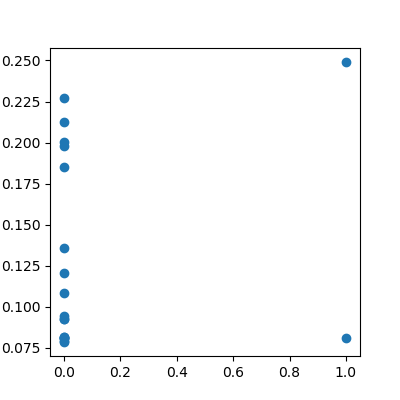

<IPython.core.display.Javascript object>


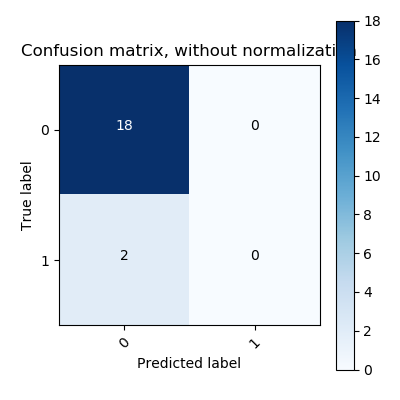

Confusion matrix, without normalization
[[18  0]
 [ 2  0]]


In [62]:
y_pred = best_classifier.predict(x_test)
if type(y_test) is pd.DataFrame:
    y_test = y_test.values.ravel()
y_pred_prob = best_classifier.predict_proba(x_test)
y_pred_prob = y_pred_prob[:,1]

print(y_pred)
print(y_test)
plt.figure(figsize = (4,4))
plt.plot(y_test,y_pred_prob, 'o')
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4,4))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')

In [63]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [64]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_prob)
auc = metrics.roc_auc_score(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<IPython.core.display.Javascript object>

In [39]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [40]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])